<a href="https://colab.research.google.com/github/SamanZargarzadeh/Deep-Learning/blob/main/17_CNN_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classifier for the SVHN dataset
## Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.




In [1]:
import tensorflow as tf
from scipy.io import loadmat

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

For this assignment, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [4]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. Load and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [5]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/MyDrive/train_32x32.mat')
test = loadmat('/content/gdrive/MyDrive/test_32x32.mat')

Both train and test are dictionaries with keys X and y for the input images and labels respectively.

In [18]:
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

In [19]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape) 
print("test X shape: ", X_test.shape)   
print("test y shape: ", y_test.shape)

train X shape:  (32, 32, 3, 73257)
train y shape:  (73257, 1)
test X shape:  (32, 32, 3, 26032)
test y shape:  (26032, 1)


In [20]:
X_train = X_train.transpose((3,0,1,2))
X_test = X_test.transpose((3,0,1,2))

In [21]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape) 
print("test X shape: ", X_test.shape)   
print("test y shape: ", y_test.shape)  

train X shape:  (73257, 32, 32, 3)
train y shape:  (73257, 1)
test X shape:  (26032, 32, 32, 3)
test y shape:  (26032, 1)


In [22]:
print("minimum train y value: ", min(y_train))
print("maximum train y value: ", max(y_train))

minimum train y value:  [0]
maximum train y value:  [9]


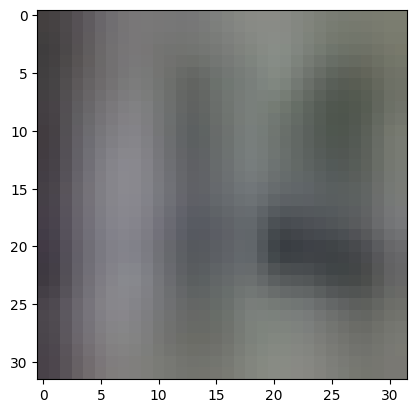

Label: [1]


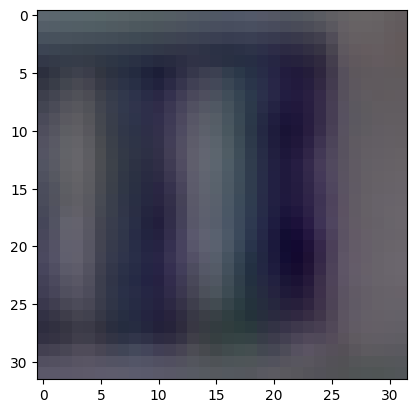

Label: [1]


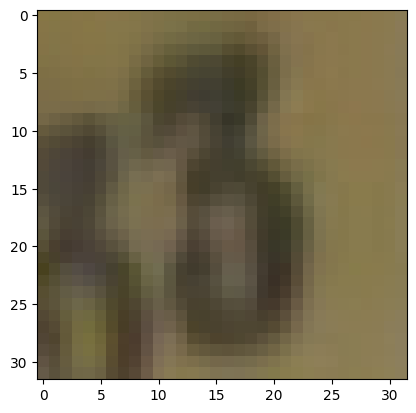

Label: [3]


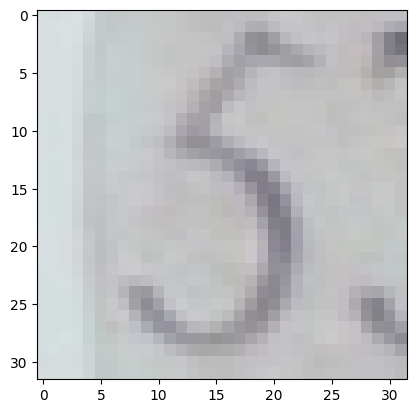

Label: [5]


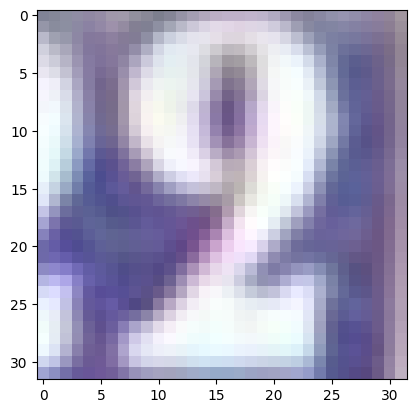

Label: [2]


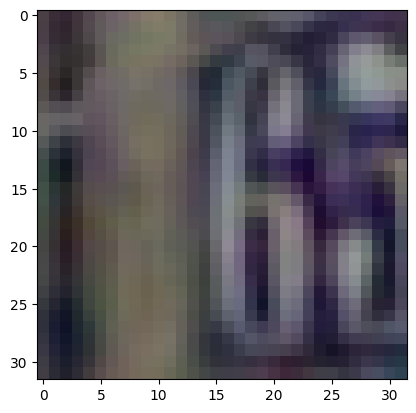

Label: [6]


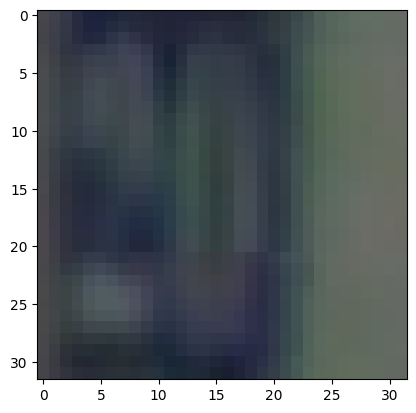

Label: [0]


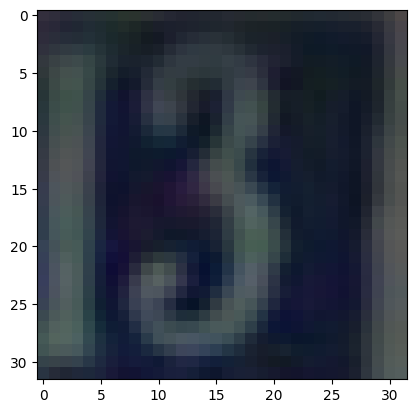

Label: [3]


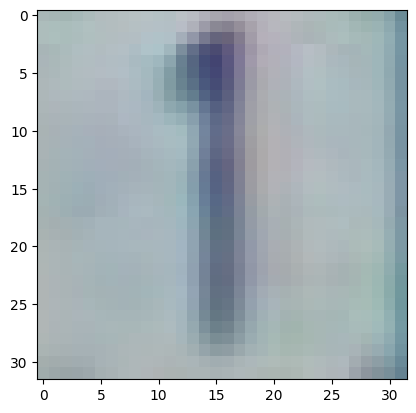

Label: [1]


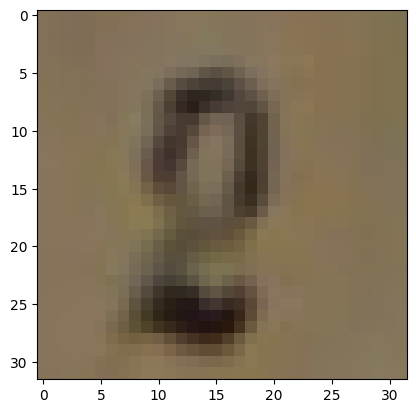

Label: [2]


In [23]:
for i in range(10):
    random_inx = np.random.choice(X_train.shape[0])
    X_sample = X_train[random_inx, :, :]
    plt.imshow(X_sample)
    plt.show()
    print(f"Label: {y_train[random_inx]}")

In [24]:
# Normalize 
X_train = X_train/255.
X_test = X_test/255.

In [25]:
# change labels 10 to 0 (in both train and test sets)
y_train[y_train==10] = 0
y_test[y_test==10] = 0

In [27]:
print("minimum train y value: ", min(y_train))
print("maximum train y value: ", max(y_train))

minimum train y value:  [0]
maximum train y value:  [9]


# 2. Multi-layer Perceptron (MLP) neural network classifier
Construct a model to fit to the data. Using the Sequential API, build your model according to the following specifications:

* Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output.
* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* The first layer should be a dense layer with 64 units.
* The weights of the first layer should be initialised with the He uniform initializer.
* The biases of the first layer should be all initially equal to one.
* There should then be a dense layer, with 128 units.
* Add batch normalization layer and dropuout layer (dropout rate = 0.2). 
* This should be followed with a dense layer, with 64 units.
* Add batch normalization layer and dropuout layer (dropout rate = 0.2). 
* All of the Dense layers should use the ReLU activation function.
* The output Dense layer should have 10 units and the softmax activation function.
* Add weight decay (l2 kernel regularisation) in all Dense layers except the final softmax layer.
* Print out the model summary (using the summary() method).
* Compile and train the model (a maximum of 30 epochs), making use of both training and validation sets during the training run (use an Adam optimizer with learning rate = 0.001).
* Your model should track at least one appropriate metric, and use at least one callbacks during training, such as a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [37]:
from keras.regularizers import l2
model = Sequential([Flatten(input_shape=(32, 32, 3)),
                    Dense(64, activation = 'relu',kernel_regularizer=l2(0.001), kernel_initializer='he_uniform', bias_initializer='ones'),
                    Dense(128, activation = 'relu',kernel_regularizer=l2(0.001)),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(64, activation = 'relu',kernel_regularizer=l2(0.001), ),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                196672    
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                      

In [43]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [44]:
# fit the model with validation set

history = model.fit(X_train, y_train , batch_size=256, epochs=30, verbose=2, validation_split=0.2) 

Epoch 1/30
229/229 - 8s - loss: 2.3608 - sparse_categorical_accuracy: 0.2838 - val_loss: 1.9719 - val_sparse_categorical_accuracy: 0.3904 - 8s/epoch - 35ms/step
Epoch 2/30
229/229 - 6s - loss: 1.5945 - sparse_categorical_accuracy: 0.5494 - val_loss: 1.5234 - val_sparse_categorical_accuracy: 0.5811 - 6s/epoch - 28ms/step
Epoch 3/30
229/229 - 4s - loss: 1.3701 - sparse_categorical_accuracy: 0.6262 - val_loss: 1.6271 - val_sparse_categorical_accuracy: 0.5083 - 4s/epoch - 17ms/step
Epoch 4/30
229/229 - 4s - loss: 1.2765 - sparse_categorical_accuracy: 0.6504 - val_loss: 1.6804 - val_sparse_categorical_accuracy: 0.5141 - 4s/epoch - 17ms/step
Epoch 5/30
229/229 - 5s - loss: 1.2059 - sparse_categorical_accuracy: 0.6713 - val_loss: 1.3299 - val_sparse_categorical_accuracy: 0.6043 - 5s/epoch - 22ms/step
Epoch 6/30
229/229 - 4s - loss: 1.1672 - sparse_categorical_accuracy: 0.6803 - val_loss: 1.2441 - val_sparse_categorical_accuracy: 0.6422 - 4s/epoch - 19ms/step
Epoch 7/30
229/229 - 4s - loss: 1.

In [45]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


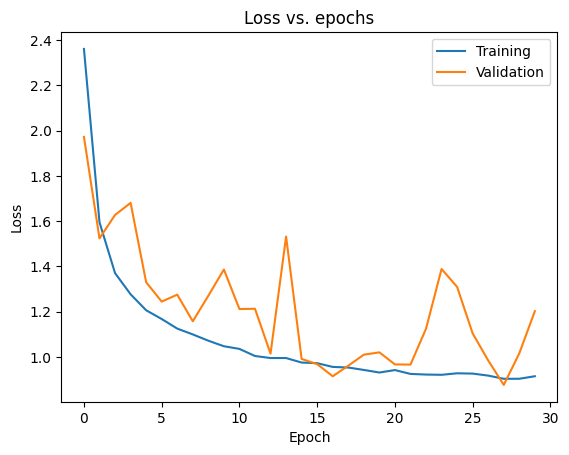

In [46]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* the input layer with input_shape (32, 32, 3). 
* the first layer (conv1), has 6 filters with a shape of 5x5, with a relu activation function.
* the second layer (pool1), is a max pooling layer, with size 2x2 and stride of 2x2.
* the third layer (conv2), has 6 filters with a shape of 5x5, with a relu activation function.
* the fourth layer (pool2), is a max pooling layer, with size 2x2 and stride of 2x2.
* the fifth layer, flatten/unroll to a long vector.
* the sixth layer, is a fully connected layer, with 120 units, with a relu activation function.
* Add batch normalization layer and dropuout layer. 
* the seventh layer, is a fully connected layer, with 84 units, with a relu activation function.
* Add batch normalization layer and dropuout layer. 
* the output (final) layer is a multi-class with 10 classes (activation function is softmax).
* Print out the model summary (using the summary() method). Does the CNN model have fewer trainable parameters than your MLP model? why?
* Compile and train the model (a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least one callbacks during training, such as a ModelCheckpoint callback.
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.
* Does your CNN model beat the MLP model performance?

In [51]:
model = Sequential([
                    Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu', input_shape=(32, 32, 3)), # note we need 1 in  input_shape=(28,28,1)
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'), # note we need 1 in  input_shape=(28,28,1)
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(120, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(84, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 6)         906       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 6)          0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 150)               0         
                                                                 
 dense_20 (Dense)            (None, 120)              

In [56]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

In [58]:
# fit the model with validation set

history = model.fit(X_train[..., np.newaxis] , y_train, epochs = 30, batch_size = 256, verbose = 2, validation_split=0.2)


Epoch 1/30
229/229 - 48s - loss: 2.2368 - sparse_categorical_accuracy: 0.1896 - val_loss: 2.2373 - val_sparse_categorical_accuracy: 0.1875 - 48s/epoch - 209ms/step
Epoch 2/30
229/229 - 42s - loss: 2.2368 - sparse_categorical_accuracy: 0.1896 - val_loss: 2.2368 - val_sparse_categorical_accuracy: 0.1875 - 42s/epoch - 186ms/step
Epoch 3/30
229/229 - 43s - loss: 2.2366 - sparse_categorical_accuracy: 0.1896 - val_loss: 2.2378 - val_sparse_categorical_accuracy: 0.1875 - 43s/epoch - 187ms/step
Epoch 4/30
229/229 - 42s - loss: 2.2367 - sparse_categorical_accuracy: 0.1896 - val_loss: 2.2496 - val_sparse_categorical_accuracy: 0.1875 - 42s/epoch - 185ms/step
Epoch 5/30
229/229 - 43s - loss: 2.2368 - sparse_categorical_accuracy: 0.1896 - val_loss: 2.2412 - val_sparse_categorical_accuracy: 0.1875 - 43s/epoch - 187ms/step
Epoch 6/30
229/229 - 42s - loss: 2.2366 - sparse_categorical_accuracy: 0.1896 - val_loss: 2.2422 - val_sparse_categorical_accuracy: 0.1875 - 42s/epoch - 185ms/step
Epoch 7/30
229/2

In [59]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


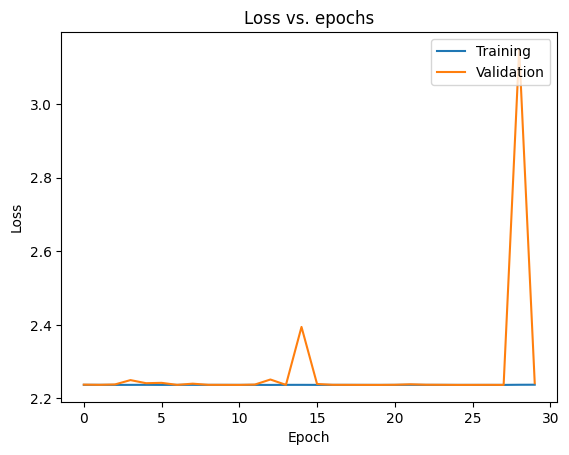

In [84]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [66]:
labels = [
    '0', # 0
    '1',     # 1
    '2',    # 2
    '3',       # 3
    '4',        # 4
    '5',      # 5
    '6',       # 6
    '7',     # 7
    '8',         # 8
    '9'   # 9
]

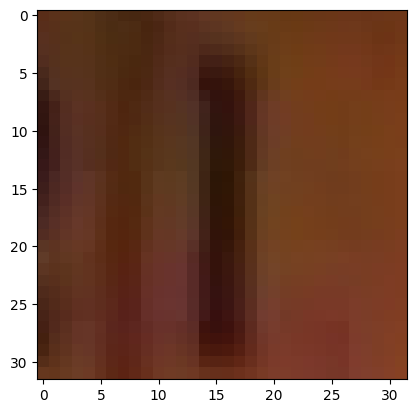

[1]


In [81]:
# Choose a random test image

random_inx = np.random.choice(X_test.shape[0])
X_sample = X_test[random_inx, :]
plt.imshow(X_sample)
plt.show()
print(y_test[random_inx])

In [82]:
# Get model predictions

predictions = model.predict(X_sample[np.newaxis,...,np.newaxis])


1/1 [==============================] - 0s 25ms/step


In [83]:
# Get the model prediction label
print(np.argmax(predictions))
print(f"Model prediction:{labels[np.argmax(predictions)]}")

1
Model prediction:1
